## Using the data to understand both data and business to develop questions set

### Import & Read in Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
s_cal = pd.read_csv('./calendar.csv')
s_list = pd.read_csv('./listings.csv')
s_rev = pd.read_csv('./reviews.csv')

### Understanding Calendar File

In [3]:
s_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
s_cal.shape

(1393570, 4)

In [5]:
s_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
s_cal['date'] = pd.to_datetime((s_cal['date'])) # make date into datetime
s_cal['price'] = s_cal['price'].replace({'\$':'',',':''}, regex=True).astype(float)  # make price numerical
s_cal.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [7]:
s_cal.describe(include='all')

,listing_id,date,available,price
count,1393570.00000,1393570,1393570,934542.00000
unique,nan,365,2,nan
top,nan,2016-12-27 00:00:00,t,nan
freq,nan,3818,934542,nan
first,nan,2016-01-04 00:00:00,NaN,nan
last,nan,2017-01-02 00:00:00,NaN,nan
mean,5550111.41854,NaN,NaN,137.94486
std,2962273.53007,NaN,NaN,105.06287
min,3335.00000,NaN,NaN,10.00000
25%,3258213.00000,NaN,NaN,75.00000


In [8]:
s_cal_null= s_cal.dropna(subset=['price'],axis=0)  # remove rows with null price
s_cal_null.describe(include='all')

,listing_id,date,available,price
count,934542.00000,934542,934542,934542.00000
unique,nan,365,1,nan
top,nan,2017-01-01 00:00:00,t,nan
freq,nan,2922,934542,nan
first,nan,2016-01-04 00:00:00,NaN,nan
last,nan,2017-01-02 00:00:00,NaN,nan
mean,5305517.15427,NaN,NaN,137.94486
std,2974820.85015,NaN,NaN,105.06287
min,3335.00000,NaN,NaN,10.00000
25%,2875975.00000,NaN,NaN,75.00000


In [9]:
print('Total number of null price:  ',(s_cal.shape[0]-s_cal['price'].count()))
print('Proportion of null price:  ',(s_cal.shape[0]-s_cal['price'].count())/s_cal.shape[0])
print('Total number containing price: ',(s_cal_null.shape[0]))

Total number of null price:   459028
Proportion of null price:   0.32938998399793334
Total number containing price:  934542


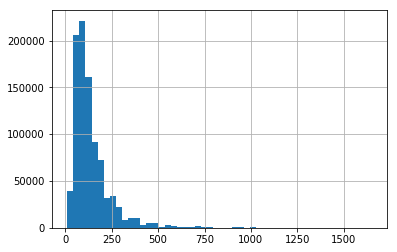

In [10]:
s_cal_null['price'].hist(bins=50) #distribution of price records with null price removed

In [11]:
print('The mode of price: ', np.sum(s_cal['price'].mode()))
print('Proportion of price less than the mode: ', np.sum(s_cal['price']<=np.sum(s_cal['price'].mode()))/s_cal.shape[0])

The mode of price:  150.0
Proportion of price less than the mode:  0.48965534562311186


In [12]:
print('The mode of price excluding null rows: ', np.sum(s_cal_null['price'].mode()))
print('Proportion of price less than the mode excluding null rows: ', np.sum(s_cal_null['price']<=np.sum(s_cal_null['price'].mode()))/s_cal_null.shape[0])
print('Number of price less than the mode excluding null rows: ', np.sum(s_cal_null['price']<=np.sum(s_cal_null['price'].mode())))

The mode of price excluding null rows:  150.0
Proportion of price less than the mode excluding null rows:  0.7301640803730598
Number of price less than the mode excluding null rows:  682369


In [13]:
s_cal['listing_id'].nunique() #how many unique listings are there


3818

In [14]:
s_cal_avail = s_cal[['listing_id','available']]
s_cal_avail['available'] = s_cal_avail['available'].map({'t': 0, 'f': 1})
s_cal_avail = s_cal_avail[['listing_id','available']].groupby('listing_id').sum()
s_cal_avail['available'] = s_cal_avail['available']/365
s_cal_avail = s_cal_avail.rename(columns={'available':'prop_booked'})

#s_list_red = s_list.drop(s_list.columns[np.where(s_list.nunique() == 1)], axis=1)

C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Number of listings that were booked every day of the year.  
#(note that 2016 was a leap year and so technically it is not a full year)

len((np.where(s_cal_avail['prop_booked'] == 1))[0])


95

In [16]:
s_cal_avail.head()

,prop_booked
listing_id,
3335,0.15342
4291,0.00000
5682,0.15342
6606,0.00000
7369,0.85479


In [17]:
#number of listings booked for the entire year
np.where(s_cal_avail['prop_booked'] == 1)[0]


array([  66,  149,  198,  307,  393,  399,  453,  604,  671,  730,  738,
        757,  772,  848,  917,  941,  986,  996, 1044, 1047, 1068, 1109,
       1119, 1121, 1131, 1134, 1138, 1146, 1196, 1225, 1244, 1253, 1278,
       1307, 1311, 1348, 1403, 1418, 1432, 1435, 1492, 1495, 1510, 1625,
       1651, 1677, 1736, 1748, 1770, 1792, 1895, 1940, 1949, 1995, 2024,
       2041, 2057, 2063, 2125, 2166, 2184, 2188, 2197, 2221, 2229, 2233,
       2313, 2483, 2508, 2519, 2588, 2800, 2816, 2960, 2977, 2993, 2998,
       3034, 3046, 3084, 3207, 3238, 3365, 3489, 3590, 3642, 3698, 3706,
       3715, 3717, 3725, 3734, 3737, 3742, 3815], dtype=int64)

In [18]:
# histogram for the properties booked between 20% and 80% of the year
s_cal_avail.query('prop_booked >= .2 & prop_booked <= .8').shape[0]

1256

In [19]:
print('Calendare rows: ',s_cal_avail.shape[0])
print('Less the below 20% and above 80%: ',s_cal_avail.drop(s_cal_avail.query('prop_booked < .2 or prop_booked > .8').index).shape[0])
print('Expect the above to be :',s_cal_avail.query('prop_booked >= .2 & prop_booked <= .8').shape[0])

Calendare rows:  3818
Less the below 20% and above 80%:  1256
Expect the above to be : 1256


#### Calendar file summary:
There are a total of 1,393,570 records within the calendar file representing 3818 unique bookings from 1/4/2016 to 1/2/2017.  Of these 459,028 (32.9%) did not contain a price.  Out of the remaining 934,542 records with price, 682,369 (73%) records were at or below the mode of $150.00.

### Understanding Listings File

In [20]:
s_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.00000,f,nan,WASHINGTON,f,moderate,f,f,2,4.07000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.00000,f,nan,WASHINGTON,f,strict,t,t,6,1.48000
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.00000,f,nan,WASHINGTON,f,strict,f,f,2,1.15000
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,nan,f,nan,WASHINGTON,f,flexible,f,f,1,nan
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.00000,f,nan,WASHINGTON,f,strict,f,f,1,0.89000


In [21]:
with pd.option_context('display.max_columns', 92):
    print(s_list.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [22]:
# Explore the neighborhood and bed type options
print(s_list['neighbourhood'].unique())
print(s_list['neighbourhood_cleansed'].unique())
print(s_list['neighbourhood_group_cleansed'].unique())
print('Bed type: ', s_list['bed_type'].unique())

['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place Market' 'Pike Market' 'Eastlake'
 'Portage Bay' 'South Lake Union' 'Magnolia' 'Belltown'
 'International District' 'Yesler Terrace' 'First Hill' 'Pioneer Square'
 'Gatewood' 'The Junction' 'Arbor Heights' 'Alki' 'North Admiral'
 'Crown Hill' 'Genesee' 'Fairmount Park' 'Interbay' 'Industrial District'
 'Holly Park' 'South Beacon Hill' 'Greenwood' 'Bitter Lake' 'Fauntleroy'
 'Mount Baker' 'Columbia City' 'Seward Park' 'Brighton' 'South Delridge'
 'Highland Park' 'High Point' 'View Ridge' 'Windermere' 'Dunlap'
 'Rainier Beach' 'North Delridge' 'Maple Leaf' 'Bryant' 'Ravenna'
 'Wedgewood' 'Riverview' 'Montlake' 'Broadway' 'Stevens' 'Victory Heights'
 'Mathews Beach' 'Cedar Park' 'Meadowbrook' '

In [23]:
s_list.shape

(3818, 92)

In [24]:
s_list['id'].nunique()

3818

*Note the number of records is the same as the id's, and so there is one record per id.  This is also the same number as the listing id from the calendar file.*

In [25]:
#Number of single value enteries
np.where(s_list.nunique() == 1)

(array([ 2,  3,  8, 41, 43, 44, 67, 72, 83, 85], dtype=int64),)

In [26]:
with pd.option_context('display.max_columns', 92):
    print(s_list.describe(include='all'))


                   id                           listing_url  \
count      3818.00000                                  3818   
unique            nan                                  3818   
top               nan  https://www.airbnb.com/rooms/8566501   
freq              nan                                     1   
mean    5550111.41854                                   NaN   
std     2962660.47856                                   NaN   
min        3335.00000                                   NaN   
25%     3258256.25000                                   NaN   
50%     6118244.50000                                   NaN   
75%     8035126.75000                                   NaN   
max    10340165.00000                                   NaN   

                  scrape_id last_scraped                    name  \
count            3818.00000         3818                    3818   
unique                  nan            1                    3792   
top                     nan   2016-01-0

In [27]:
#Remove columns with only one value (included scrape_id since last_scraped is all the same date)

s_list_red = s_list.drop(s_list.columns[np.where(s_list.nunique() == 1)], axis=1)
s_list_red.shape

(3818, 82)

In [28]:
#Remove columns with all null

s_list_red = s_list_red.dropna(how = 'all', axis = 1)
s_list_red.shape

(3818, 81)

In [29]:
np.set_printoptions(threshold=sys.maxsize)
s_list.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [30]:
#review differences between host listing and total host listing
s_list[['host_listings_count','host_total_listings_count',]].head()

,host_listings_count,host_total_listings_count
0,3.00000,3.00000
1,6.00000,6.00000
2,2.00000,2.00000
3,1.00000,1.00000
4,2.00000,2.00000


In [31]:
# Only two records with host_listings_count != host_total_listings_count, but these come up as NaN for both values.

with pd.option_context('display.max_columns', 92):
    print(s_list.query('host_listings_count != host_total_listings_count'))

            id                            listing_url       scrape_id  \
1297   8354452   https://www.airbnb.com/rooms/8354452  20160104002432   
1419  10235014  https://www.airbnb.com/rooms/10235014  20160104002432   

     last_scraped                                name  \
1297   2016-01-04   The View | Be Inspired in Seattle   
1419   2016-01-04  Luxury Apartment in Belltown / SLU   

                                                summary  \
1297  A studio with stunning waterfront view worth t...   
1419  Beautiful building near the heart of downtown ...   

                                                  space  \
1297  Looking for that perfect spot to take-in all o...   
1419                                                NaN   

                                            description experiences_offered  \
1297  A studio with stunning waterfront view worth t...                none   
1419  Beautiful building near the heart of downtown ...                none   

              

In [32]:
#confirm the above
np.sum(s_list[['host_listings_count', 'host_total_listings_count']].isnull())

host_listings_count          2
host_total_listings_count    2
dtype: int64

In [33]:
#Explore some categorical values
print('State values: ',np.unique(s_list_red['state']))
print('City values: ',np.unique(s_list_red['city']))
print('Property type values: ',s_list_red['property_type'].unique())
print('Room type values: ',np.unique(s_list_red['room_type']))
print('Amenities values: ',np.unique(s_list_red['amenities']))
print('Bathroom values: ',s_list_red['bathrooms'].unique())
print('Bedrooms values: ',s_list_red['bedrooms'].unique())
print('Beds values: ', s_list_red['beds'].unique())

State values:  ['WA' 'wa']
City values:  ['Ballard, Seattle' 'Phinney Ridge Seattle' 'Seattle' 'Seattle '
 'West Seattle' 'seattle' '西雅图']
Property type values:  ['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]
Room type values:  ['Entire home/apt' 'Private room' 'Shared room']
Amenities values:  ['{"Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed",Heating,Washer,Dryer,"Smoke Detector",Essentials,Shampoo,"Lock on Bedroom Door",Hangers}'
 '{"Cable TV","Elevator in Building",Heating,Washer,Dryer}'
 '{"Cable TV","Wireless Internet","Air Conditioning","Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),"Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo}'
 '{"Cable TV","Wireless Internet","Air Conditioning","Wheelchair Accessible",Kitchen,"Free Parking on Premises"

 '{}']
Bathroom values:  [1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  nan 5. ]
Bedrooms values:  [ 1.  5.  0.  3.  2.  6.  4. nan  7.]
Beds values:  [ 1.  7.  2.  3. 15.  5.  4.  6.  9.  8. nan 10.]


In [34]:
#How many bed types are Futon
a = s_list.query('bed_type == "Futon"').shape[0]

print('Total number of Futon: ',a) 
print('Percent of cleanliness reviews: ', a/(s_list.shape[0]-np.sum(s_list['review_scores_cleanliness'].isnull())))


Total number of Futon:  74
Percent of cleanliness reviews:  0.023380726698262244


In [35]:
test = pd.DataFrame(s_list['bed_type']=='Futon')

test.head()

,bed_type
0,False
1,False
2,False
3,False
4,False


In [36]:
#Establish a discrete list of amenities
amenities = s_list['amenities'].tolist()
amenities = ''.join(amenities)
amenities = amenities.replace("}",',')
amenities = amenities.replace('{','')
amenities = amenities.replace('"','')

#print(amenities)
options = {}
options_name = []
for item in amenities.split(','):
    name = item.lower()
    if item not in options:
        options.update({item:name})
        #options_name.append(name)
        
del options['']
print(len(options))
options


41


{'TV': 'tv',
 'Cable TV': 'cable tv',
 'Internet': 'internet',
 'Wireless Internet': 'wireless internet',
 'Air Conditioning': 'air conditioning',
 'Kitchen': 'kitchen',
 'Heating': 'heating',
 'Family/Kid Friendly': 'family/kid friendly',
 'Washer': 'washer',
 'Dryer': 'dryer',
 'Free Parking on Premises': 'free parking on premises',
 'Buzzer/Wireless Intercom': 'buzzer/wireless intercom',
 'Smoke Detector': 'smoke detector',
 'Carbon Monoxide Detector': 'carbon monoxide detector',
 'First Aid Kit': 'first aid kit',
 'Safety Card': 'safety card',
 'Fire Extinguisher': 'fire extinguisher',
 'Essentials': 'essentials',
 'Pets Allowed': 'pets allowed',
 'Pets live on this property': 'pets live on this property',
 'Dog(s)': 'dog(s)',
 'Cat(s)': 'cat(s)',
 'Hot Tub': 'hot tub',
 'Indoor Fireplace': 'indoor fireplace',
 'Shampoo': 'shampoo',
 'Breakfast': 'breakfast',
 '24-Hour Check-in': '24-hour check-in',
 'Hangers': 'hangers',
 'Hair Dryer': 'hair dryer',
 'Iron': 'iron',
 'Laptop Frien

In [37]:
#Add amenities into dataframe
for item in options:
    s_list[options[item]] = s_list['amenities'].str.contains(item)
    

C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Explore values for reviews to ensure expectations
print('Review rating values', s_list_red['review_scores_rating'].unique())
print('Review accuracy values', s_list_red['review_scores_accuracy'].unique())
print('Review cleanliness values', s_list_red['review_scores_cleanliness'].unique())
print('Review checkin values', s_list_red['review_scores_checkin'].unique())
print('Review communication values', s_list_red['review_scores_communication'].unique())
print('Review location values', s_list_red['review_scores_location'].unique())
print('Review value values', s_list_red['review_scores_value'].unique())



Review rating values [ 95.  96.  97.  nan  92.  99.  98. 100.  80.  85.  84.  88.  75.  90.
  91.  94.  93.  77.  89.  71.  82.  87.  73.  83.  86.  76.  78.  66.
  74.  60.  64.  70.  68.  72.  40.  79.  55.  20.  67.  57.  65.  53.
  81.]
Review accuracy values [10. nan  9.  8.  6.  7.  4.  2.]
Review cleanliness values [10. nan  9.  8.  7.  6.  5.  4.  3.]
Review checkin values [10. nan  9.  8.  7.  4.  6.  5.  2.]
Review communication values [10. nan  9.  8.  6.  4.  7.  2.  5.]
Review location values [ 9. 10. nan  8.  7.  4.  6.]
Review value values [10. nan  9.  8.  7.  6.  4.  2.  5.]


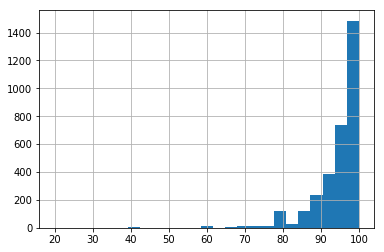

In [39]:
#distriburion of overall review scores
s_list_red['review_scores_rating'].hist(bins=25)

Original price datatype:  object
Updatedprice datatype:  float64
Price mode:  150.0


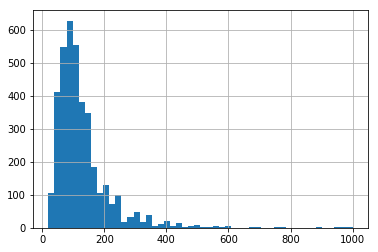

In [40]:
#evaluate price dtype and distribution
print('Original price datatype: ',s_list_red['price'].dtypes)
s_list_red['price'] = s_list_red['price'].replace({'\$':'',',':''}, regex=True).astype(float)  # make price numerical
print('Updatedprice datatype: ',s_list_red['price'].dtypes)
print('Price mode: ',np.sum(s_list_red['price'].mode()))
s_list_red['price'].hist(bins=50)


In [41]:
s_list_red['price'].describe()

count   3818.00000
mean     127.97617
std       90.25002
min       20.00000
25%       75.00000
50%      100.00000
75%      150.00000
max     1000.00000
Name: price, dtype: float64

In [42]:
s_list['security_deposit'].unique()

array([nan, '$100.00', '$1,000.00', '$700.00', '$150.00', '$500.00',
       '$300.00', '$400.00', '$1,500.00', '$250.00', '$200.00', '$750.00',
       '$140.00', '$350.00', '$600.00', '$95.00', '$5,000.00', '$125.00',
       '$800.00', '$499.00', '$399.00', '$450.00', '$995.00', '$2,500.00',
       '$175.00', '$225.00', '$550.00', '$115.00', '$120.00', '$99.00',
       '$149.00', '$780.00', '$2,000.00', '$1,200.00', '$360.00',
       '$375.00', '$199.00', '$109.00', '$449.00', '$195.00', '$295.00',
       '$185.00', '$134.00', '$650.00', '$180.00', '$1,900.00', '$220.00'],
      dtype=object)

## Listing Summary
There are 3,318 listings.  Each listing has 92 columns that can be summarized broadly sumarized into categories of URL, host info, location, property description, cost, availability and reviews.

We find that some of the columns are not of interest as they contain no varibility of values (either 1 or no values).  Additionally, we see that there are some data governance issues where free form text can semantically have the same value by be represented with different syntax (i.e. WA and wa).

**Initial questions related to this data set alone:**
<ul>
<li>How does descriptive ratings influence the overal rating (i.e. how important are those measures to an individual).  However this implies that the overal rating is not already a calculation created by air bnb</li>
<li>How does location relate to cost</li>
<li>Is the weekly rate cheaper (for comparable properties) when the other fees are higher</li>
<li>What is the correlation between cost and availability</li>
<li>What is the correlation between cost and rating</li>
    </ul>

### Understanding Reviews File

In [43]:
s_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [44]:
s_rev.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [45]:
s_rev['date'] = pd.to_datetime((s_rev['date'])) # make date into datetime

In [46]:
s_rev.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [47]:
s_rev.describe(include='all')

,listing_id,id,date,reviewer_id,reviewer_name,comments
count,84849.00000,84849.00000,84849,84849.00000,84849,84831
unique,nan,nan,1930,nan,14380,84136
top,nan,nan,2015-09-21 00:00:00,nan,David,The host canceled this reservation the day bef...
freq,nan,nan,580,nan,870,57
first,nan,nan,2009-06-07 00:00:00,nan,NaN,NaN
last,nan,nan,2016-01-03 00:00:00,nan,NaN,NaN
mean,3005067.19061,30587645.35656,NaN,17013006.64394,NaN,NaN
std,2472877.10956,16366130.19724,NaN,13537038.26508,NaN,NaN
min,4291.00000,3721.00000,NaN,15.00000,NaN,NaN
25%,794633.00000,17251274.00000,NaN,5053141.00000,NaN,NaN


In [48]:
'''
note the reviews are from 6/7/2009 to 1/3/2016 where the bookings begin on 1/4/2017, 
and so all of these comments would have been available to each of the bookers.
''';

In [49]:
#evaluate uniqueness of id's 
print('Number of listing id: ', s_rev['listing_id'].nunique())
print('Number of id: ', s_rev['id'].nunique())

Number of listing id:  3191
Number of id:  84849


In [50]:
#Create a table of number of times reviewed
s_rev_no = s_rev[['listing_id','reviewer_id']]
s_rev_no['reviewer_id'] = 1
s_rev_no = s_rev_no[['listing_id','reviewer_id']].groupby('listing_id').sum()
s_rev_no = s_rev_no.rename(columns={'reviewer_id':'no_reviews'})
s_rev_no.head()

C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,no_reviews
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79


In [51]:
#test_index=s_cal_avail.set_index('listing_id')
#test_index.head()

s_cal_avail.head()

,prop_booked
listing_id,
3335,0.15342
4291,0.00000
5682,0.15342
6606,0.00000
7369,0.85479


In [52]:
#Join booked info to listing
main_data = s_list.join(s_cal_avail, on='id')
main_data = main_data.join(s_rev_no, on='id')
print(main_data.shape)
main_data.head()

(3818, 135)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,lock on bedroom door,wheelchair accessible,gym,pool,smoking allowed,other pet(s),doorman,washer / dryer,prop_booked,no_reviews
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,False,False,False,False,False,False,False,False,0.05205,207.00000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,False,False,False,False,False,False,False,False,0.20274,43.00000
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,False,False,False,False,False,False,False,False,0.39726,20.00000
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,False,False,False,False,False,False,False,False,0.60822,nan
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,False,False,False,False,False,False,False,False,0.00000,38.00000


### Questions to answer
    - What features contribute the the price, and does the separate cleaning constitute a hidden charge (i.e. does the true price really reflect the price + cleaning fee
    - What is most important for the overal ratting (i.e. location, cleanliness, value, etc.)
    - Do those who charge cleaning fees get better cleanliness reviews
    - Do lower prices coorelate to better reviews, and higher prices to more variability
    - For those with reviews what is the biggest driver to being booked most frequently?  What factors would support a 40%-60% occupancy rate